In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D

In [75]:
mnist = tf.keras.datasets.mnist

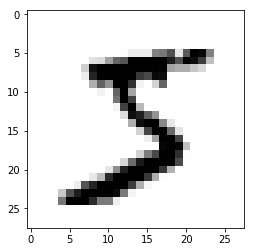

In [76]:
(mnist_x_train, mnist_y_train) , (mnist_x_test, mnist_y_test) = mnist.load_data()
plt.imshow(mnist_x_train[0], cmap = plt.cm.binary)

In [77]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train, axis = 1)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test, axis = 1)

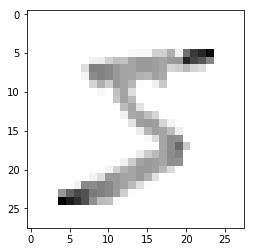

In [78]:
plt.imshow(mnist_x_train[0], cmap = plt.cm.binary)

In [79]:
model = tf.keras.models.Sequential()

model.add(Conv1D(64, 4, input_shape = mnist_x_train.shape[1:], activation = 'relu'))
model.add(Conv1D(64, 4, activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 4, input_shape = mnist_x_train.shape[1:], activation = 'relu'))
model.add(Conv1D(128, 4, activation = 'relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [80]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
%%time
model.fit(mnist_x_train,mnist_y_train, epochs = 13)
mnist_val_loss, mnist_val_acc = model.evaluate(mnist_x_test,mnist_y_test)
print(mnist_val_loss,mnist_val_acc)

Epoch 1/13
60000/60000 [==============================] - 38s 627us/step - loss: 0.3169 - acc: 0.8999
Epoch 2/13
60000/60000 [==============================] - 36s 595us/step - loss: 0.0994 - acc: 0.9709
Epoch 3/13
60000/60000 [==============================] - 35s 584us/step - loss: 0.0707 - acc: 0.9797
Epoch 4/13
60000/60000 [==============================] - 36s 593us/step - loss: 0.0573 - acc: 0.9830
Epoch 5/13
60000/60000 [==============================] - 36s 598us/step - loss: 0.0444 - acc: 0.9870
Epoch 6/13
60000/60000 [==============================] - 36s 603us/step - loss: 0.0384 - acc: 0.9887
Epoch 7/13
60000/60000 [==============================] - 36s 603us/step - loss: 0.0349 - acc: 0.9897
Epoch 8/13
60000/60000 [==============================] - 36s 604us/step - loss: 0.0288 - acc: 0.9913
Epoch 9/13
60000/60000 [==============================] - 37s 614us/step - loss: 0.0286 - acc: 0.9913
Epoch 10/13
60000/60000 [==============================] - 37s 612us/step - loss: 

In [9]:
model.save('mnist_9917.model')